In [20]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784") # 28*28 = 784

In [53]:
X,y = dataset["data"], dataset["target"]

In [54]:
type(dataset), type(["data"]), type(["target"])

(sklearn.utils.Bunch, list, list)

In [55]:
X = X / 255

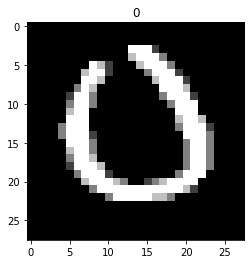

In [24]:
import matplotlib.pyplot as plt
i = 10010
img_1 = X[i,:].reshape(28,28)
plt.imshow(img_1, cmap='gray')
plt.title(y[i])
plt.show()

In [25]:
import numpy as np

In [29]:
y.shape

(1, 70000)

In [30]:
digits = 10
examples = y.shape[1]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [32]:
Y_new.shape

(10, 70000)

In [33]:
Y_new[:100]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
y[0,100]

'5'

In [37]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]


In [38]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

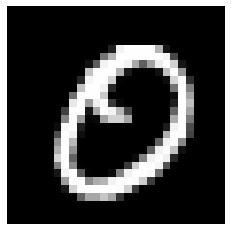

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap ='gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [43]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [44]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [45]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [46]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  6.984157229585298
Epoch 100 cost:  0.7478957558577279
Epoch 200 cost:  0.5635892393727395
Epoch 300 cost:  0.48694281524493094
Epoch 400 cost:  0.4413799758153927
Epoch 500 cost:  0.409461931661225
Epoch 600 cost:  0.38495414332790245
Epoch 700 cost:  0.3650532133243386
Epoch 800 cost:  0.3483158877614125
Epoch 900 cost:  0.33390319705776106
Epoch 1000 cost:  0.3212953728696137
Epoch 1100 cost:  0.3101482605465101
Epoch 1200 cost:  0.30020075067397983
Epoch 1300 cost:  0.29124230396060014
Epoch 1400 cost:  0.28310344203053983
Epoch 1500 cost:  0.27565088696319606
Epoch 1600 cost:  0.2687804068520978
Epoch 1700 cost:  0.2624087615732443
Epoch 1800 cost:  0.2564683506014656
Epoch 1900 cost:  0.25090450992910873
Final cost: 0.2457244170584408


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 959    0   11    3    1   16    9    1    8    8]
 [   0 1111    2    2    2    1    1    6    2    6]
 [   2    5  939   24    6    3    3   27   13    2]
 [   1    2   13  922    2   36    1    6   29   12]
 [   0    1   13    1  902    3   17    7   11   40]
 [   7    2    1   31    1  780   16    2   19    8]
 [   6    2   12    1   13   15  900    0    8    3]
 [   1    2   10    9    2    2    2  943   13   31]
 [   4   10   28   14    7   25    7    9  864   12]
 [   0    0    3    3   46   11    2   27    7  887]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1016
           1       0.98      0.98      0.98      1133
           2       0.91      0.92      0.91      1024
           3       0.91      0.90      0.91      1024
           4       0.92      0.91      0.91       995
           5       0.87      0.90      0.89       867
           6       0.94      0.94      0.94       960
           7       0.92      0.93   